In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
data = pd.read_csv('dataA.csv')
del data['Unnamed: 0']
def CLASS(diagnosis):
    if diagnosis == 'M':
        return 1
    if diagnosis == 'B':
        return 0

        
data['Diagnosis_classify'] = data['diagnosis'].apply(CLASS)
dropvar = ['id','diagnosis']
data = data.drop(dropvar, axis = 1)
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis_classify
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [0]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

**hypothesis/feature selection 1/2**

In [0]:
from sklearn.model_selection import train_test_split
X = data[['radius_worst','radius_mean','perimeter_mean','concave points_mean','concavity_mean','perimeter_worst', 'concave points_worst', 'area_worst', 'texture_worst']] # this is feature selection 2
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
THRESHOLD = 0.5
y_pred1 = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[104   4]
 [  1  62]]
Accuracy: 0.9735449735449736


In [0]:
# decision tree-feature selection 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X2 = data[['radius_mean','perimeter_mean','concave points_mean','concavity_mean','radius_worst',
           'perimeter_worst','concave points_worst','area_worst','texture_worst']]
y2 = data['Diagnosis_classify']
X_train2c,X_test2c,y_train2c,y_test2c = train_test_split(X2,y2,test_size=0.3, random_state = 0) #70%train 30%testscaler = StandardScaler()

scaler = StandardScaler()
X_train_std2C = scaler.fit_transform(X_train2c)
X_test_std2C = scaler.transform(X_test2c)

#Import Random Forest Model (RF)
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf2 = RandomForestClassifier(n_estimators=100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf2.fit(X_train_std2C,y_train2c)
THRESHOLD = 0.7
y_pred2c = np.where(rf2.predict_proba(X_test_std2C)[:,1] > THRESHOLD, 1, 0)
print(y_pred2c)

from sklearn.metrics import classification_report
print(classification_report(y_test2c,y_pred2c))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test2c, y_pred2c)
print(cnf_matrix)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2c, y_pred2c))
print("Precision:",metrics.precision_score(y_test2c, y_pred2c))
print("Recall:",metrics.recall_score(y_test2c, y_pred2c))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       108
           1       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

[[107   1]
 [  8  55]]
Accuracy: 0.9473684210526315
Precision: 0.9821428571428571
Recall: 0.873015873015873


Logistic Regression Dropping radius mean




In [0]:
# Logistic Regression
from sklearn.model_selection import train_test_split
X = data[['perimeter_mean','concave points_mean',
          'texture_worst','concavity_mean','perimeter_worst',
          'concave points_worst', 'area_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state= 100)

# fit the model with data
logreg.fit(X_train,y_train)

#
THRESHOLD = 0.5 # new
y_pred1 = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0) # new
#y_pred1=logreg.predict(X_test)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[102   6]
 [  5  58]]
Accuracy: 0.9325396825396824


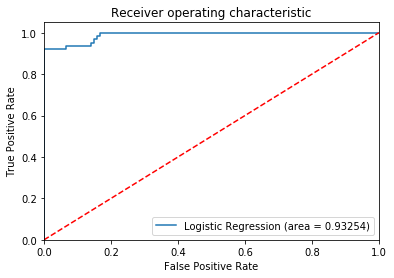

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic Regression Dropping perimeter mean

In [0]:
# Logistic Regression
from sklearn.model_selection import train_test_split
X = data[['radius_mean','concave points_mean',
          'texture_worst','concavity_mean','perimeter_worst',
          'concave points_worst', 'area_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state= 100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred1=logreg.predict(X_test)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

[[103   5]
 [  4  59]]
Accuracy: 0.9451058201058201


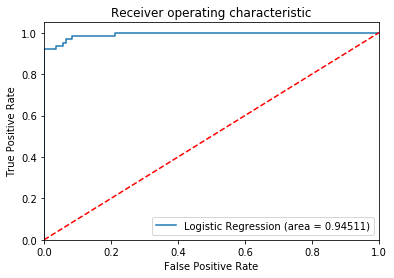

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic Regression Dropping concave point mean

In [0]:
# Logistic Regression
from sklearn.model_selection import train_test_split
X = data[['radius_mean','perimeter_mean',
          'texture_worst','concavity_mean','perimeter_worst',
          'concave points_worst', 'area_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state= 100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred1=logreg.predict(X_test)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[104   4]
 [  3  60]]
Accuracy: 0.9576719576719577


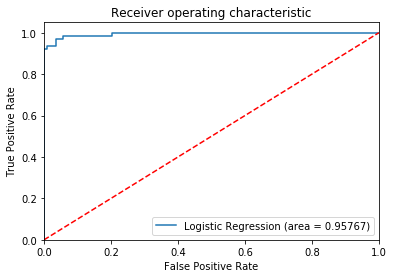

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic Regression Dropping texture worst

In [0]:
# Logistic Regression
from sklearn.model_selection import train_test_split
X = data[['radius_mean','perimeter_mean','concave points_mean',
          'concavity_mean','perimeter_worst',
          'concave points_worst', 'area_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state= 100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred1=logreg.predict(X_test)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[[104   4]
 [  4  59]]
Accuracy: 0.9497354497354498


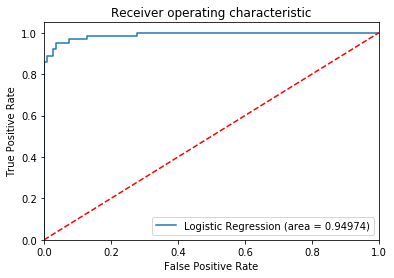

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic Regression Dropping concavity mean

In [0]:
# Logistic Regression
from sklearn.model_selection import train_test_split
X = data[['radius_mean','perimeter_mean','concave points_mean',
          'texture_worst','perimeter_worst',
          'concave points_worst', 'area_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state= 100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred1=logreg.predict(X_test)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[104   4]
 [  3  60]]
Accuracy: 0.9576719576719577


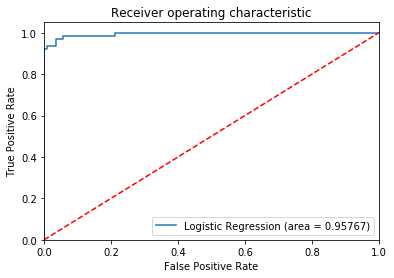

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Logistic Regression Dropping perimeter worst


In [0]:
# Logistic Regression
from sklearn.model_selection import train_test_split
X = data[['radius_mean','perimeter_mean','concave points_mean',
          'texture_worst','concavity_mean',
          'concave points_worst', 'area_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state= 100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred1=logreg.predict(X_test)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  2  61]]
Accuracy: 0.974867724867725


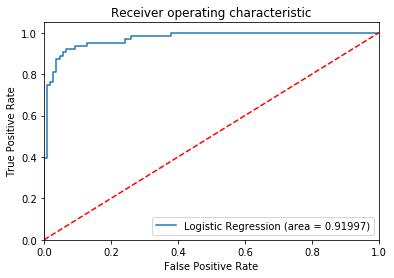

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic Regression Dropping concave point worst

In [0]:
# Logistic Regression
from sklearn.model_selection import train_test_split
X = data[['radius_mean','perimeter_mean','concave points_mean',
          'texture_worst','concavity_mean','perimeter_worst',
           'area_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state= 100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred1=logreg.predict(X_test)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[104   4]
 [  3  60]]
Accuracy: 0.9576719576719577


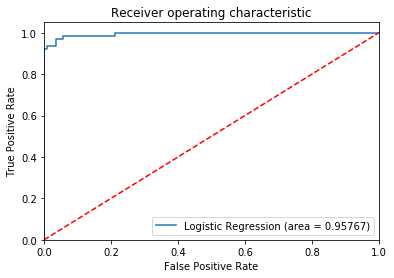

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic Regression Dropping area worst

In [0]:
# Logistic Regression
from sklearn.model_selection import train_test_split
X = data[['radius_mean','perimeter_mean','concave points_mean',
          'texture_worst','concavity_mean','perimeter_worst',
          'concave points_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state= 100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred1=logreg.predict(X_test)
print(y_pred1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
auc = metrics.roc_auc_score(y_test, y_pred1)
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred1))

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.89      0.90      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

[[101   7]
 [  6  57]]
Accuracy: 0.919973544973545


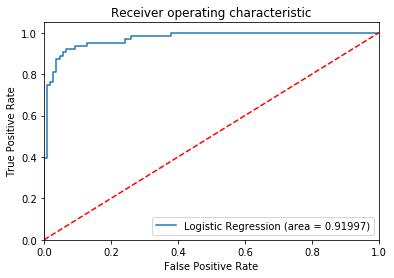

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()